In [2]:
import pandas as pd

#ici on lit le fichier CSV lié à la station du 18ème

df = pd.read_csv("/Users/Edouard_1/Deep Air project/PA75018.csv")
df = df.drop(columns="Unnamed: 0")
#df["date"]= df[df.Date_time
df








,Date_time,PM25,PM10,NO2,NO,NOX,O3,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,14.2,14.0,0.0,15.3,66.0,75018 - Flocon,Urbain
1,2018/01/01 02:00:00+00,NaN,13.0,14.0,1.0,16.3,66.0,75018 - Flocon,Urbain
2,2018/01/01 03:00:00+00,NaN,11.6,14.0,0.0,15.8,64.0,75018 - Flocon,Urbain
3,2018/01/01 04:00:00+00,NaN,11.9,15.0,0.0,17.2,62.0,75018 - Flocon,Urbain
4,2018/01/01 05:00:00+00,NaN,14.5,14.0,0.0,14.8,62.0,75018 - Flocon,Urbain
...,...,...,...,...,...,...,...,...,...
42667,2022/11/13 20:00:00+00,20.5,23.2,28.3,20.1,59.1,0.7,75018 - Flocon,Urbain
42668,2022/11/13 21:00:00+00,22.6,22.5,27.9,12.9,47.8,1.2,75018 - Flocon,Urbain
42669,2022/11/13 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain
42670,2022/11/13 23:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain


In [3]:
#Ici on applique une fonction sur la colonne date pour extraire les dates sans les heures dans une nouvelle colonne 

def left_string(x):
    return x[0:10]


df["date"]=df.Date_time.apply(left_string)
df




,Date_time,PM25,PM10,NO2,NO,NOX,O3,Station_name,Station_type,date
0,2018/01/01 01:00:00+00,NaN,14.2,14.0,0.0,15.3,66.0,75018 - Flocon,Urbain,2018/01/01
1,2018/01/01 02:00:00+00,NaN,13.0,14.0,1.0,16.3,66.0,75018 - Flocon,Urbain,2018/01/01
2,2018/01/01 03:00:00+00,NaN,11.6,14.0,0.0,15.8,64.0,75018 - Flocon,Urbain,2018/01/01
3,2018/01/01 04:00:00+00,NaN,11.9,15.0,0.0,17.2,62.0,75018 - Flocon,Urbain,2018/01/01
4,2018/01/01 05:00:00+00,NaN,14.5,14.0,0.0,14.8,62.0,75018 - Flocon,Urbain,2018/01/01
...,...,...,...,...,...,...,...,...,...,...
42667,2022/11/13 20:00:00+00,20.5,23.2,28.3,20.1,59.1,0.7,75018 - Flocon,Urbain,2022/11/13
42668,2022/11/13 21:00:00+00,22.6,22.5,27.9,12.9,47.8,1.2,75018 - Flocon,Urbain,2022/11/13
42669,2022/11/13 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain,2022/11/13
42670,2022/11/13 23:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain,2022/11/13


In [19]:
#Case pour extraire le jour et l'heure puis le convertir en datetime object

def left_stringv2(x):
    return x[0:19]

df["date_hour"]=df.Date_time.apply(left_stringv2)
df["date_hour"]= pd.to_datetime(df['date_hour'])
df.dtypes,



Date_time               object
PM25                   float64
PM10                   float64
NO2                    float64
NO                     float64
NOX                    float64
O3                     float64
Station_name            object
Station_type            object
date                    object
date_hour       datetime64[ns]
dtype: object

In [36]:
df["date"]=pd.to_datetime(df["date"])
df.dtypes




Date_time               object
PM25                   float64
PM10                   float64
NO2                    float64
NO                     float64
NOX                    float64
O3                     float64
Station_name            object
Station_type            object
date            datetime64[ns]
date_hour       datetime64[ns]
dtype: object

In [56]:
#Ici on calcule le pourcentage de NAN par colonne 

def pourcentage_nan(x):

    total = df.isnull().sum().sort_values(ascending = False)
    percent = total / len(df) * 100
    return percent

pourcentage_nan(df)









PM25            83.103675
PM10             3.620641
NO2              3.308961
NO               3.308961
NOX              3.308961
O3               2.139576
Date_time        0.000000
Station_name     0.000000
Station_type     0.000000
date             0.000000
date_hour        0.000000
dtype: float64

In [42]:
#Ici on groupby par date pour les colonnes liées aux particules qui sont calculées en réalisant une moyenne journalière 

df_pm = df.groupby(by="date")[['PM25','PM10']].mean()
df_pm









,PM25,PM10
date,,
2018-01-01,NaN,10.665217
2018-01-02,NaN,15.362500
2018-01-03,NaN,14.416667
2018-01-04,NaN,9.358333
2018-01-05,NaN,13.150000
...,...,...
2022-11-10,11.300000,18.820833
2022-11-11,11.404167,14.129167
2022-11-12,20.741667,27.429167


In [44]:
#Ici on groupby par date pour les colonnes liées à l'Ozone 03 - le dioxyde d'azote NO2 et le dioxyde de souffre SO2 qui sont calculées en réalisant un max journalier 


df_pollu = df.groupby(by="date")[['O3','NO2']].max()
df_pollu







,O3,NO2
date,,
2018-01-01,66.0,25.0
2018-01-02,62.0,56.0
2018-01-03,70.0,35.0
2018-01-04,57.0,40.0
2018-01-05,71.0,64.0
...,...,...
2022-11-10,43.0,50.8
2022-11-11,42.2,41.3
2022-11-12,12.1,54.2


In [45]:
#Ici on merge les deux dataframes créées pour en faire un seul 

df_merged = pd.merge(df_pm,df_pollu,on="date")
df_merged






,PM25,PM10,O3,NO2
date,,,,
2018-01-01,NaN,10.665217,66.0,25.0
2018-01-02,NaN,15.362500,62.0,56.0
2018-01-03,NaN,14.416667,70.0,35.0
2018-01-04,NaN,9.358333,57.0,40.0
2018-01-05,NaN,13.150000,71.0,64.0
...,...,...,...,...
2022-11-10,11.300000,18.820833,43.0,50.8
2022-11-11,11.404167,14.129167,42.2,41.3
2022-11-12,20.741667,27.429167,12.1,54.2


In [46]:
# On regarde le pourcentage de nan sur ce nouveau df 


total_merged = df_merged.isnull().sum().sort_values(ascending = False)
percent_merged = total_merged / len(df_merged) * 100
percent_merged





PM25    82.349635
NO2      2.304666
PM10     0.899382
O3       0.843170
dtype: float64

<AxesSubplot:xlabel='PM25', ylabel='Count'>

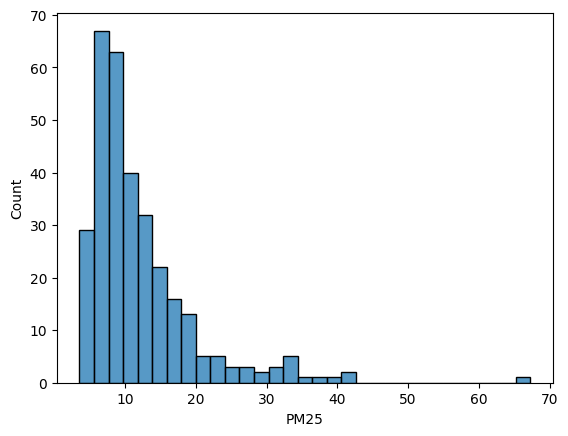

In [25]:
import seaborn as sns

sns.histplot(df_merged,x="PM25")





<AxesSubplot:xlabel='date'>

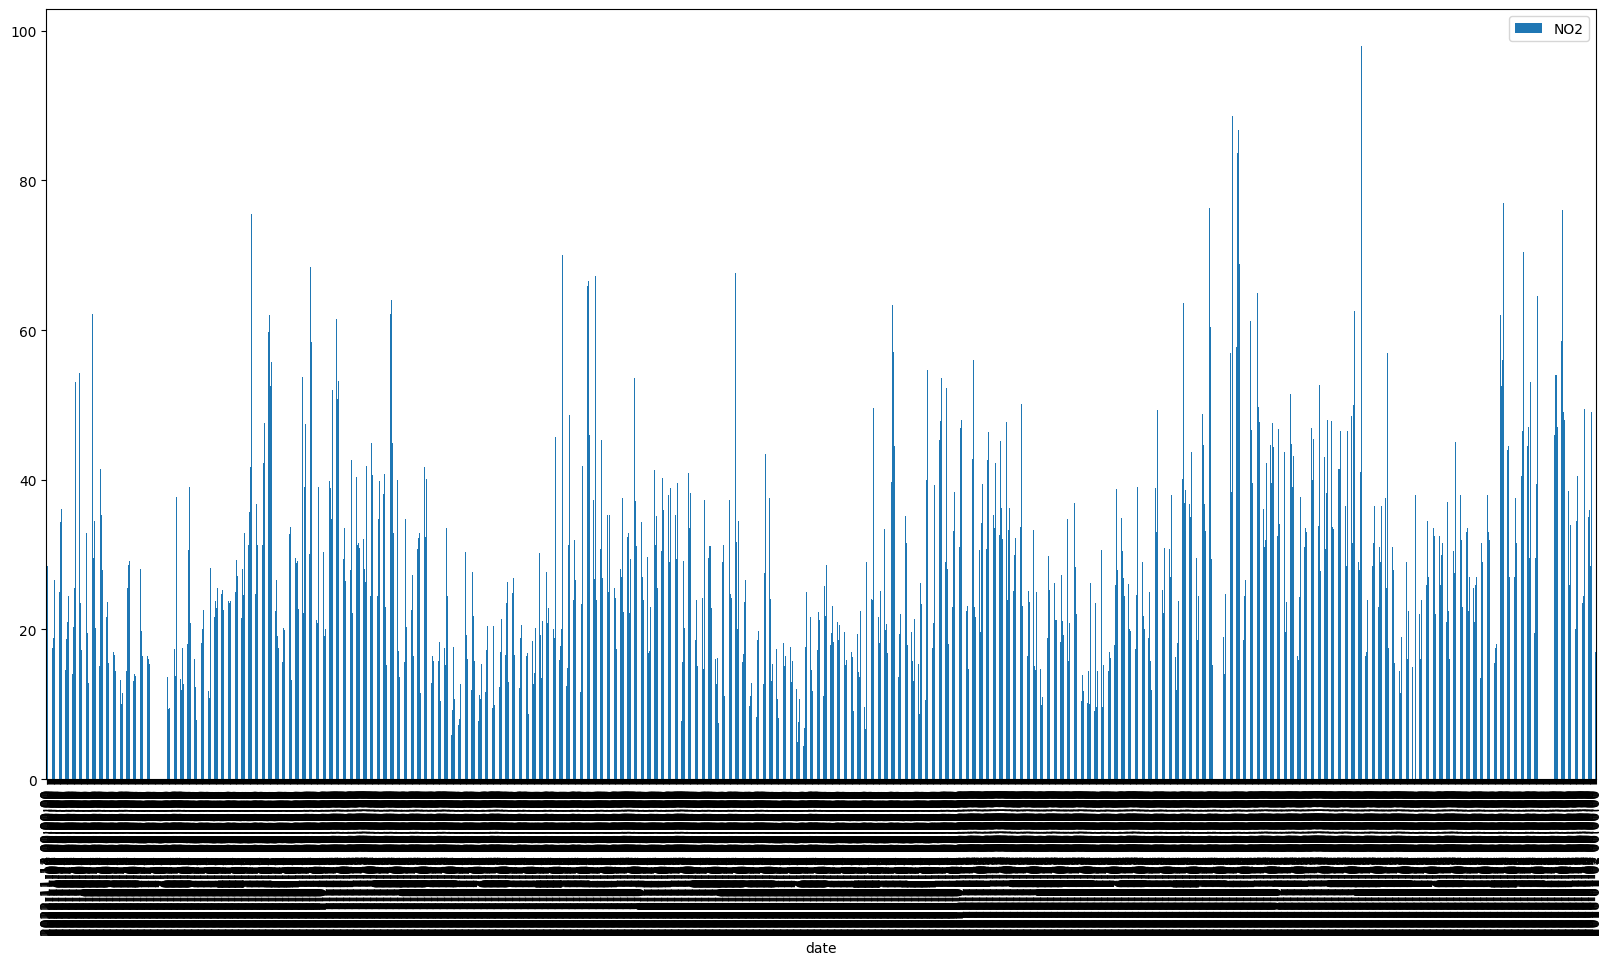

In [47]:
df[['NO2', 'date']].groupby(['date']).median().sort_values("date", ascending = False).plot.bar(figsize=(20,10))



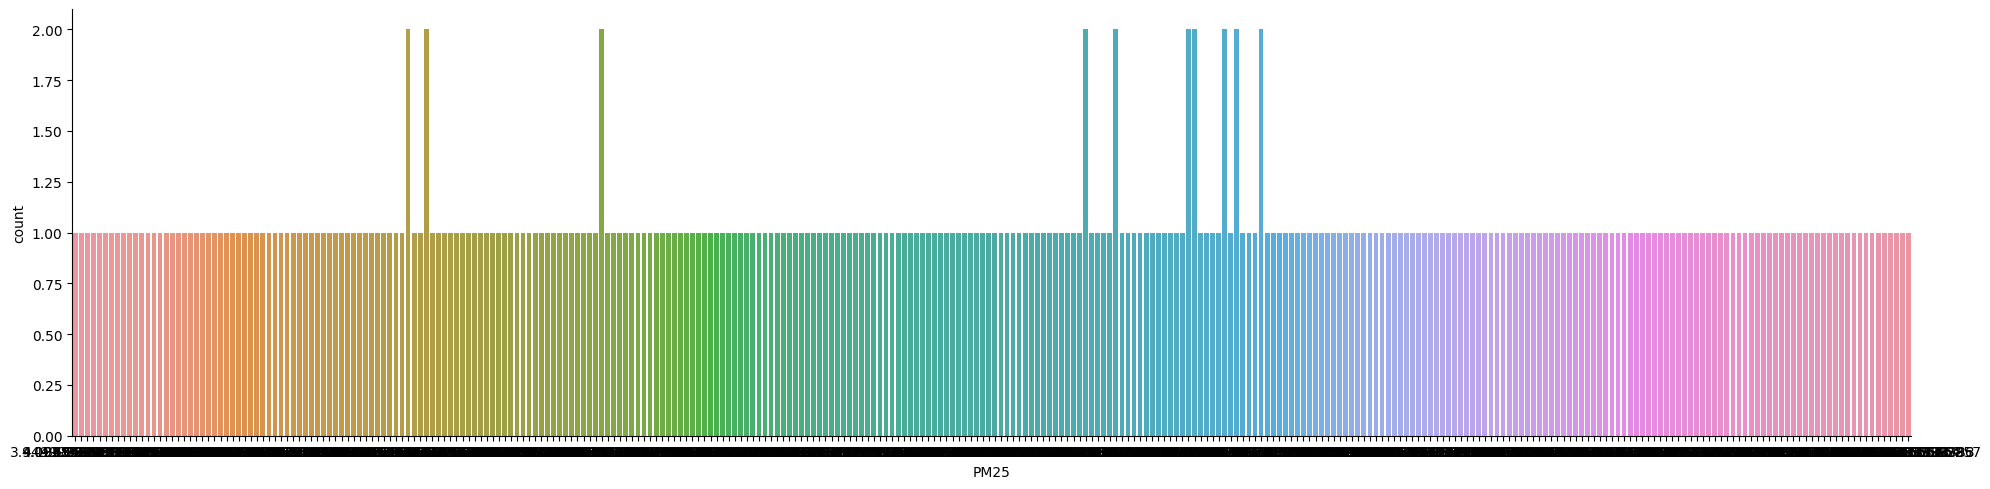

In [12]:
sns.catplot(x = "PM25", kind = "count",  data = df_merged, height=5, aspect = 4)



In [13]:
import matplotlib.pyplot as plt




ValueError: Grouper for 'NO2' not 1-dimensional

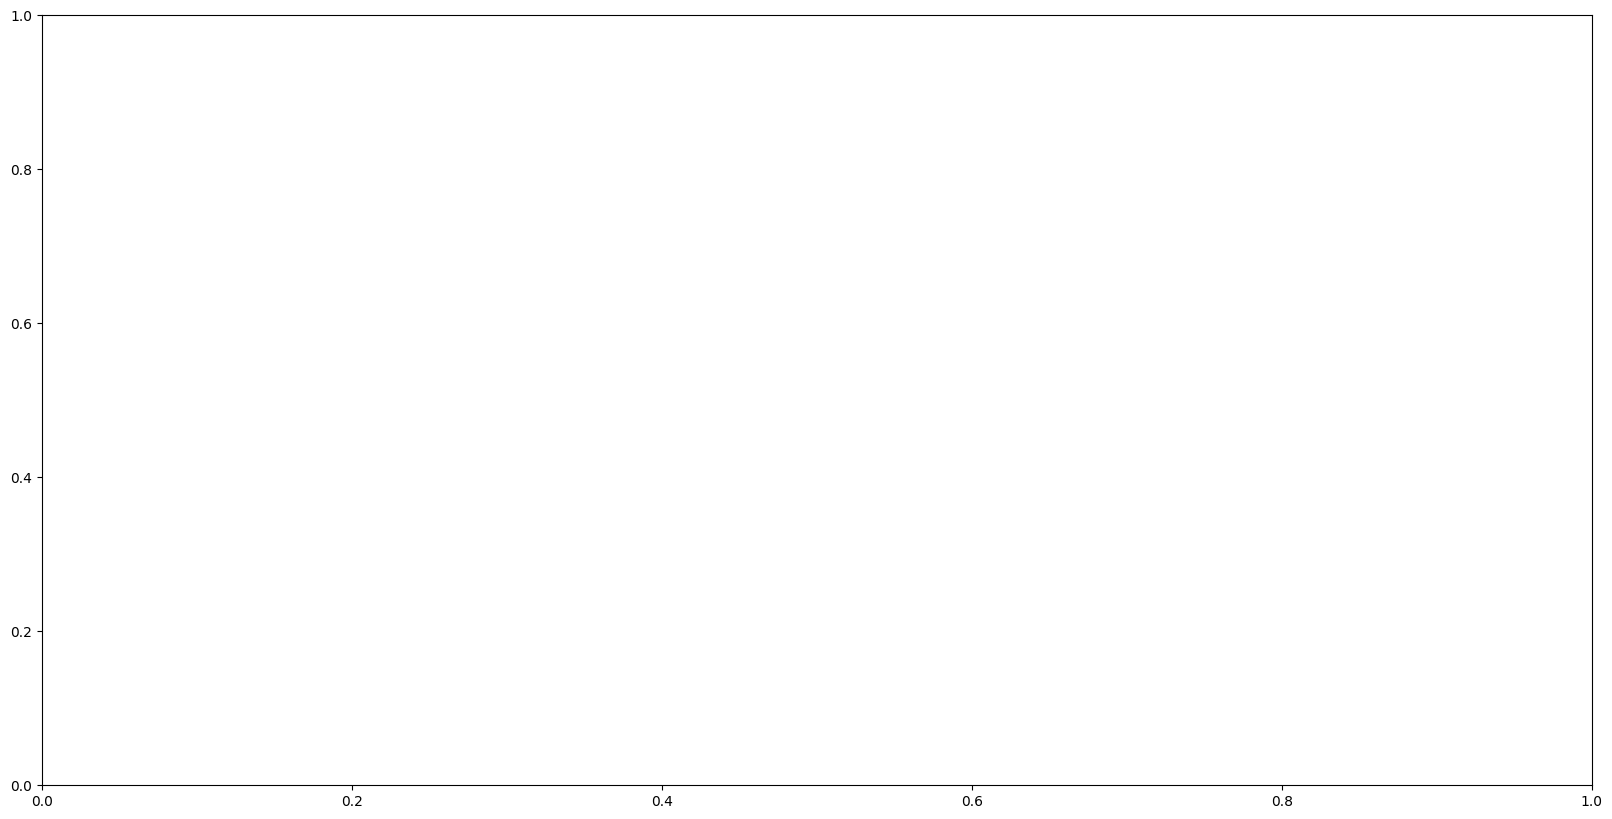

In [14]:
fig, ax = plt.subplots(figsize=(20,10))      



sns.heatmap(df.pivot_table('NO2', index='date',columns=['NO2'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)


<AxesSubplot:ylabel='date'>

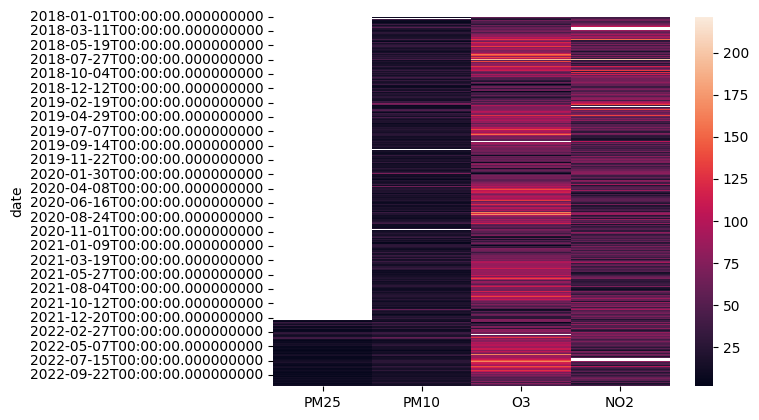

In [48]:
sns.heatmap(df_merged)



In [ ]:
df_merged.index.to_datetime()


#df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')





In [ ]:
#Test pour les time series 
df_NO2 = df_merged["NO2"]
df_NO2_resample = df_NO2.resample(rule = "M").mean()

In [51]:

def analyse_df(df, corr_limit = 0.75):
    """Analyse any dataframe and print results
    * Print df Shape, duplicate rows qnt, memory usage, data types and call DataFrame.describe()
    * Check Missing values in each columns, returning qnt. and percentage 
    * Check Linear Correlation between columns, return Pearson number
    Keyword arguments:
    df -- Any DataFrame
    corr_limit -- Correlation Limit (Pearson) to define if relationship exists (default 0.75)
    """   

    print('General Info:')
    print(f'{df.shape[0]} Rows {df.shape[1]} Columns'
          f'\n{df.duplicated().sum()} Duplicated Rows'
          f'\nMemory Usage: {df.memory_usage().sum()/(1024*1024):.2f}Mb')
    
    # Checking Data Types
    int_list, float_list,object_list,bool_list,other_list =[[] for i in range(5)]
    for col in df.columns:
        if df[col].dtype == 'int64':
            int_list.append(col)
        elif df[col].dtype == 'float64':
            float_list.append(col)
        elif df[col].dtype == 'object':
            object_list.append(col)
        elif df[col].dtype == 'boolean':
            bool_list.append(col)
        else:
            other_list.append(col)
            
    for type_list,data_type in zip([int_list, float_list,object_list,bool_list,other_list],
                                   ['int64','float64','object','boolean','other']):
        if len(type_list)>0:
            print(f'\nColumns {data_type}: {type_list}')
            
    # General statistics
    display(df.describe())
    
    # Checking Missing Values in each columns
    print('\nCheking Missing Values:')
    col_with_missing_counter = 0
    for col in df.columns:
        qnt_missing = df[col].isna().sum()
        if qnt_missing > 0:
            col_with_missing_counter +=1
            print(f'Column "{col}" has {qnt_missing} missing values ({qnt_missing/df.shape[0]:.2%})')
    if col_with_missing_counter ==0 :
        print('Analyzed DataFrame has no missing values')
        
    # Checking linear correlation between columns
    print('\nChecking Linear Correlation:')
    df_corr = df.corr() # Correlation DataFrame
    ckecked_list =[] # Ensure that we won't print the same information twice
    cols_with_correlation_counter = 0
    for col in df_corr.columns:
        ckecked_list.append(col)
        for i in range(len(df_corr)):
            if ((df_corr[col][i] > corr_limit or df_corr[col][i] < -corr_limit) and
                (df_corr.index[i] not in ckecked_list)):
                cols_with_correlation_counter += 1
                print(f'Linear Correlation found between columns '
                      f'{df_corr.index[i]} and {col} -> Pearson coef. = {df_corr[col][i]:.2f}')         
    if cols_with_correlation_counter == 0:
        print('No linear correlation was found')

        
        


In [52]:
analyse_df(df_merged)




General Info:
1779 Rows 4 Columns
2 Duplicated Rows
Memory Usage: 0.07Mb

Columns float64: ['PM25', 'PM10', 'O3', 'NO2']


,PM25,PM10,O3,NO2
count,314.000000,1763.000000,1764.000000,1738.000000
mean,11.915016,19.398641,74.581349,54.175547
std,7.648062,9.835748,29.663959,23.666956
min,3.562500,2.895833,1.700000,9.800000
25%,7.107102,12.604167,56.600000,37.450000
50%,9.625000,16.900000,72.600000,52.450000
75%,14.278693,24.018750,91.125000,67.000000
max,67.271429,73.712500,221.300000,199.000000



Cheking Missing Values:
Column "PM25" has 1465 missing values (82.35%)
Column "PM10" has 16 missing values (0.90%)
Column "O3" has 15 missing values (0.84%)
Column "NO2" has 41 missing values (2.30%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.91


In [ ]:
df


In [ ]:
df['PM10'].plot(lw=1.5, color='midnightblue', figsize=(16, 7))
plt.title('Hourly PM 10 Particulate Concentration', fontsize=16)
plt.xlabel('')

plt.ylabel('ug/m^3', fontsize=12);



In [ ]:
df


In [68]:
df['date_format'] = pd.to_datetime(df.Date_time, format='%Y-%m-%d')

df.set_index('date_format', inplace=True)
pd.to_datetime(df.index)
df










,Date_time,PM25,PM10,NO2,NO,NOX,O3,Station_name,Station_type,date,date_hour
date_format,,,,,,,,,,,
2018-01-01 01:00:00+00:00,2018/01/01 01:00:00+00,NaN,14.2,14.0,0.0,15.3,66.0,75018 - Flocon,Urbain,2018-01-01,2018-01-01 01:00:00
2018-01-01 02:00:00+00:00,2018/01/01 02:00:00+00,NaN,13.0,14.0,1.0,16.3,66.0,75018 - Flocon,Urbain,2018-01-01,2018-01-01 02:00:00
2018-01-01 03:00:00+00:00,2018/01/01 03:00:00+00,NaN,11.6,14.0,0.0,15.8,64.0,75018 - Flocon,Urbain,2018-01-01,2018-01-01 03:00:00
2018-01-01 04:00:00+00:00,2018/01/01 04:00:00+00,NaN,11.9,15.0,0.0,17.2,62.0,75018 - Flocon,Urbain,2018-01-01,2018-01-01 04:00:00
2018-01-01 05:00:00+00:00,2018/01/01 05:00:00+00,NaN,14.5,14.0,0.0,14.8,62.0,75018 - Flocon,Urbain,2018-01-01,2018-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13 20:00:00+00:00,2022/11/13 20:00:00+00,20.5,23.2,28.3,20.1,59.1,0.7,75018 - Flocon,Urbain,2022-11-13,2022-11-13 20:00:00
2022-11-13 21:00:00+00:00,2022/11/13 21:00:00+00,22.6,22.5,27.9,12.9,47.8,1.2,75018 - Flocon,Urbain,2022-11-13,2022-11-13 21:00:00
2022-11-13 22:00:00+00:00,2022/11/13 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain,2022-11-13,2022-11-13 22:00:00


In [ ]:
df_merged


In [ ]:
plt.figure(figsize=(16,7))

ax=sns.boxplot(x=df_merged.index, y='PM10', data=df_merged, orient='v', palette = sns.color_palette("deep", 5))



ax.set(ylim=(-10, 100))


plt.title('Boxplots of daily PM 10 by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12);





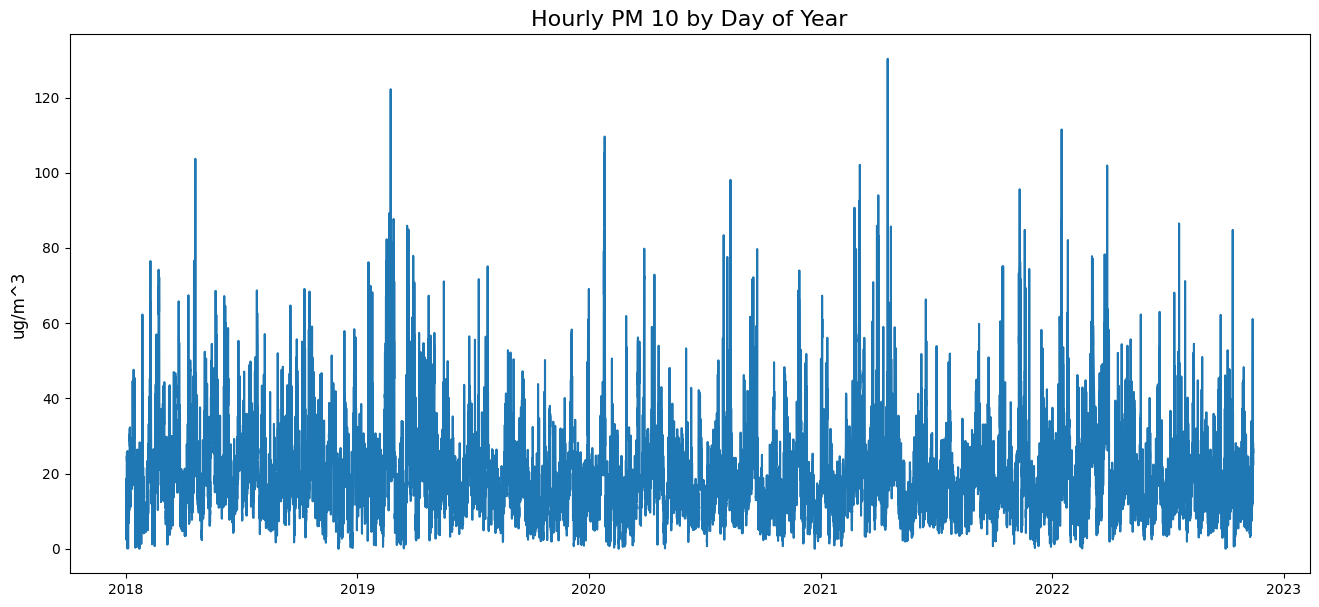

In [34]:
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(x = df.date_hour, 
             
             
             y = df['PM10'], 
             #hue = df.date_hour#,
             palette = sns.color_palette("bright", 5),
             ax = ax)


plt.xlabel('', fontsize=12)
plt.ylabel('ug/m^3', fontsize=12)
plt.title('Hourly PM 10 by Day of Year', fontsize=16);



In [57]:
df_merged


,PM25,PM10,O3,NO2
date,,,,
2018-01-01,NaN,10.665217,66.0,25.0
2018-01-02,NaN,15.362500,62.0,56.0
2018-01-03,NaN,14.416667,70.0,35.0
2018-01-04,NaN,9.358333,57.0,40.0
2018-01-05,NaN,13.150000,71.0,64.0
...,...,...,...,...
2022-11-10,11.300000,18.820833,43.0,50.8
2022-11-11,11.404167,14.129167,42.2,41.3
2022-11-12,20.741667,27.429167,12.1,54.2


In [61]:
#Ici on veut créer créer 4 colonne indiquant la classe dans laquelle le polluant se trouve chaque jour puis une 5ème colonne indiquant l'état de l'indice atmo

def NO2_categorical(x):
    
    if 10>x>0:
        return 0
        
    elif 20>x>10:
        return 1
        
    elif 25>x>20:
        return 2
        
    elif 50>x>25:
        return 3
        
    elif 75>x>50:
        return 4
    elif 75<x:
        return 5
    
df_merged["NO2_categorical"]=df_merged.NO2.apply(NO2_categorical)
df_merged

        



,PM25,PM10,O3,NO2,NO2_categorical
date,,,,,
2018-01-01,NaN,10.665217,66.0,25.0,NaN
2018-01-02,NaN,15.362500,62.0,56.0,4.0
2018-01-03,NaN,14.416667,70.0,35.0,3.0
2018-01-04,NaN,9.358333,57.0,40.0,3.0
2018-01-05,NaN,13.150000,71.0,64.0,4.0
...,...,...,...,...,...
2022-11-10,11.300000,18.820833,43.0,50.8,4.0
2022-11-11,11.404167,14.129167,42.2,41.3,3.0
2022-11-12,20.741667,27.429167,12.1,54.2,4.0
